In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the stock prices data from a CSV file
stocks = pd.read_csv('asset_prices.csv')

# Calculate the correlation matrix of the stocks
cor_matrix = stocks.iloc[:,1:].corr()

# Extract the stock indices from the correlation matrix
stocks = cor_matrix.index.values

# Convert the correlation matrix to a numpy matrix for easier graph creation
cor_matrix = np.asmatrix(cor_matrix)


The code below iterates over all possible pairs of stocks in the correlation matrix except for pairs of stocks with the same index. It adds an edge between each pair of stocks to the graph, with the correlation value as the weight of the edge.

In [5]:
# Create a graph using the correlation matrix
graph = nx.Graph()
for i, stock1 in enumerate(stocks):
    for j, stock2 in enumerate(stocks):
        if i != j:
            weight = cor_matrix[i, j]
            graph.add_edge(stock1, stock2, weight=weight)

# Print the first 5 edges with their attributes
edges = list(graph.edges(data=True))[:5]
for edge in edges:
    print(edge)


('EOD~BND.11', 'EOD~DBC.11', {'weight': -0.8220619436026627})
('EOD~BND.11', 'EOD~DIA.11', {'weight': 0.7944792033336266})
('EOD~BND.11', 'EOD~EEM.11', {'weight': 0.06990468475525749})
('EOD~BND.11', 'EOD~EFA.11', {'weight': 0.11436755413278744})
('EOD~BND.11', 'EOD~EMB.11', {'weight': 0.912853678835749})


ThE below code creates a visualization of a graph object graph. The edges and weights of the graph are extracted using the get_edge_attributes function from the NetworkX library. The positions of the nodes are defined using a circular layout with the circular_layout function from the same library.The nodes of the graph are drawn using the draw_networkx_nodes function. The positions of the nodes and their color are passed as arguments, along with their size and transparency level.The labels of the nodes are drawn using the draw_networkx_labels function. The positions, font size, and font family of the labels are passed as arguments.The edges of the graph are drawn using the draw_networkx_edges function. The positions of the nodes and the style of the edges are passed as arguments.Finally, the axis labels are removed using the set_axis_off function. The resulting image is saved as a PNG file named "part1.png" and displayed using the show function from the Matplotlib library.
It creates a visualization of a graph representing the correlation between a set of stocks. The nodes of the graph correspond to the individual stocks, and the edges represent the strength of the correlation between pairs of stocks. The code first extracts the edges and weights from the graph, and defines the positions of the nodes using a circular layout. Then, it uses matplotlib to draw the nodes, labels, and edges of the graph. Finally, it removes the axis labels, saves the image, and displays it.
The implications of this code are that it provides a visual representation of the correlation between a set of stocks, which can be useful for gaining insights into the relationships between different stocks and identifying potential investment opportunities. It also demonstrates the use of the NetworkX library for graph analysis and visualization in Python.

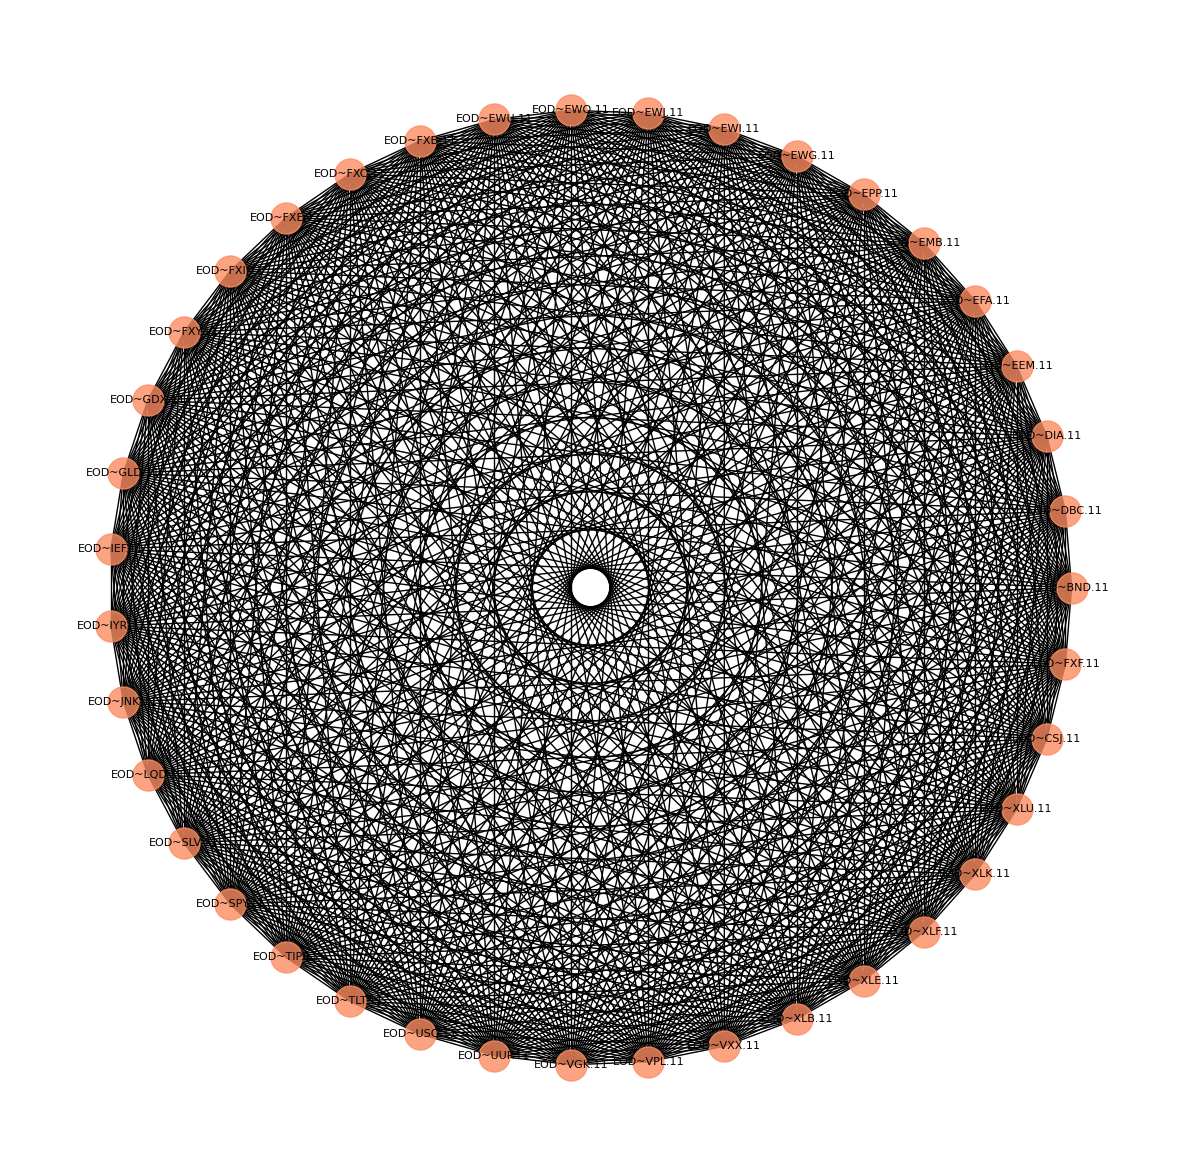

In [24]:
# Extract edges and weights from the graph
G=graph.copy()
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

# Define the positions of the nodes using a circular layout
positions = nx.circular_layout(G)

# Set the size of the figure
fig, ax = plt.subplots(figsize=(15,15))

# Draw the nodes of the graph
nx.draw_networkx_nodes(G, positions, node_color='#FC8D62', node_size=500, alpha=0.8)

# Draw the labels of the nodes
nx.draw_networkx_labels(G, positions, font_size=8, font_family='sans-serif')

# Draw the edges of the graph
nx.draw_networkx_edges(G, positions, style='solid')

# Remove the axis labels
ax.set_axis_off()

# Save the image and display it
plt.savefig("part1.png", format="PNG")
plt.show()


This code is creating a correlation matrix based on the stocks in a dataset, and then it is filtering the edges of the graph based on the direction of the correlation (positive or negative).

First, the code creates a copy of the original graph G, and then removes the edges that don't match the correlation direction specified by corr_direction (either "positive" or "negative"). For example, if corr_direction is "positive", then the code removes all edges that have a weight less than 0, indicating a negative correlation.

Then, the code gets the remaining edges and their weights from the filtered graph H, and computes the positions of the nodes using a circular layout.

Finally, the code draws the nodes, labels, and edges of the filtered graph H, and saves the plot as a PNG file with a filename indicating the correlation direction.

The implications of this code are that it allows us to visualize the correlation between stocks in a dataset, and to filter out the edges that don't match a specific correlation direction. This can be useful for identifying patterns and relationships between stocks, and for making investment decisions based on those relationships.

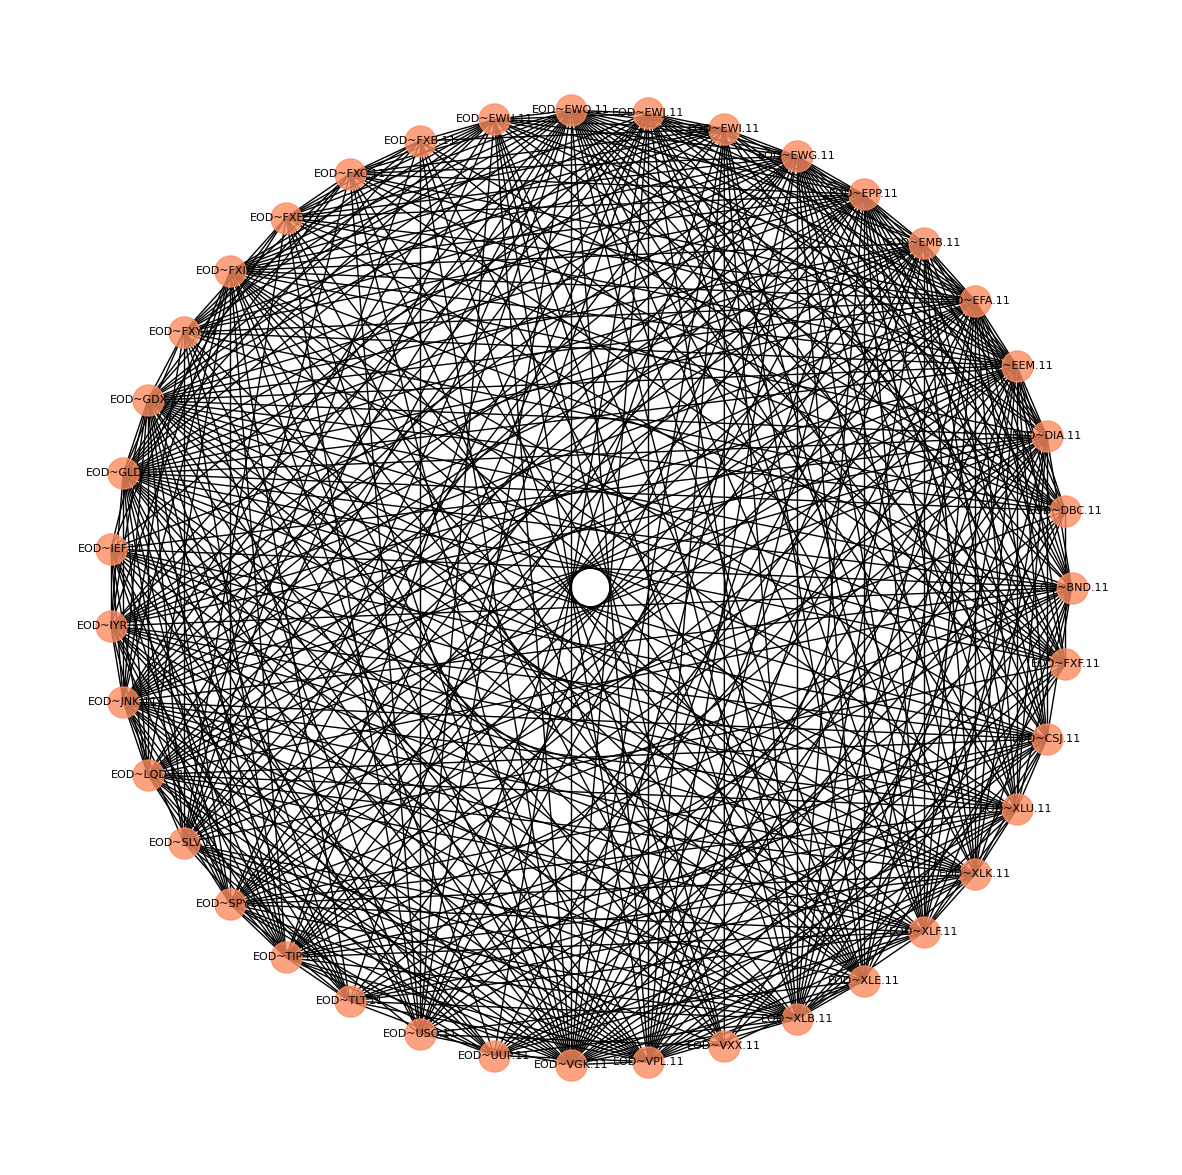

In [25]:
H = G.copy()
corr_direction="positive"
    
# Remove edges based on corr_direction
for stock1, stock2, weight in G.edges(data=True):
    if corr_direction == "positive" and weight["weight"] < 0:
        H.remove_edge(stock1, stock2)
    elif corr_direction == "negative" and weight["weight"] >= 0:
        H.remove_edge(stock1, stock2)
    
# Get edges and weights for the remaining edges
edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())

# Compute positions
positions = nx.circular_layout(H)

# Set figure size
plt.figure(figsize=(15, 15))

# Draw nodes
nx.draw_networkx_nodes(H, positions, node_color='#FC8D62',
                           node_size=500, alpha=0.8)
    
# Add labels
nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
# Draw edges
nx.draw_networkx_edges(H, positions,style='solid')
    
# Hide axis
plt.axis('off')
    
# Save and show the plot
plt.savefig(f"correlation_matrix_{corr_direction}.png", format="PNG")
plt.show()


ThE code below creates a copy of a graph G and modifies it based on the corr_direction parameter, which can be either "positive" or "negative". The modifications involve removing edges that do not meet the correlation direction criteria.

Then, the code extracts the edges and their weights from the modified graph H, increases the weights' values for better visibility, and assigns positions to the nodes in a circular layout.

The code then creates a figure of size 15x15 and draws the nodes, labels, and edges using the networkx library. The edges' color is based on their weight direction, with red for positive correlations and green for negative correlations. The edge width is also based on the weight parameter, with thicker lines representing stronger correlations.

The code filters the edges based on the direction of the correlation, i.e., positive or negative. The nodes are positioned in a circular layout, and the edge color and width are assigned based on the weight parameter.

Finally, the code saves the resulting image as a PNG file with a name that includes the corr_direction parameter and displays it without axes.

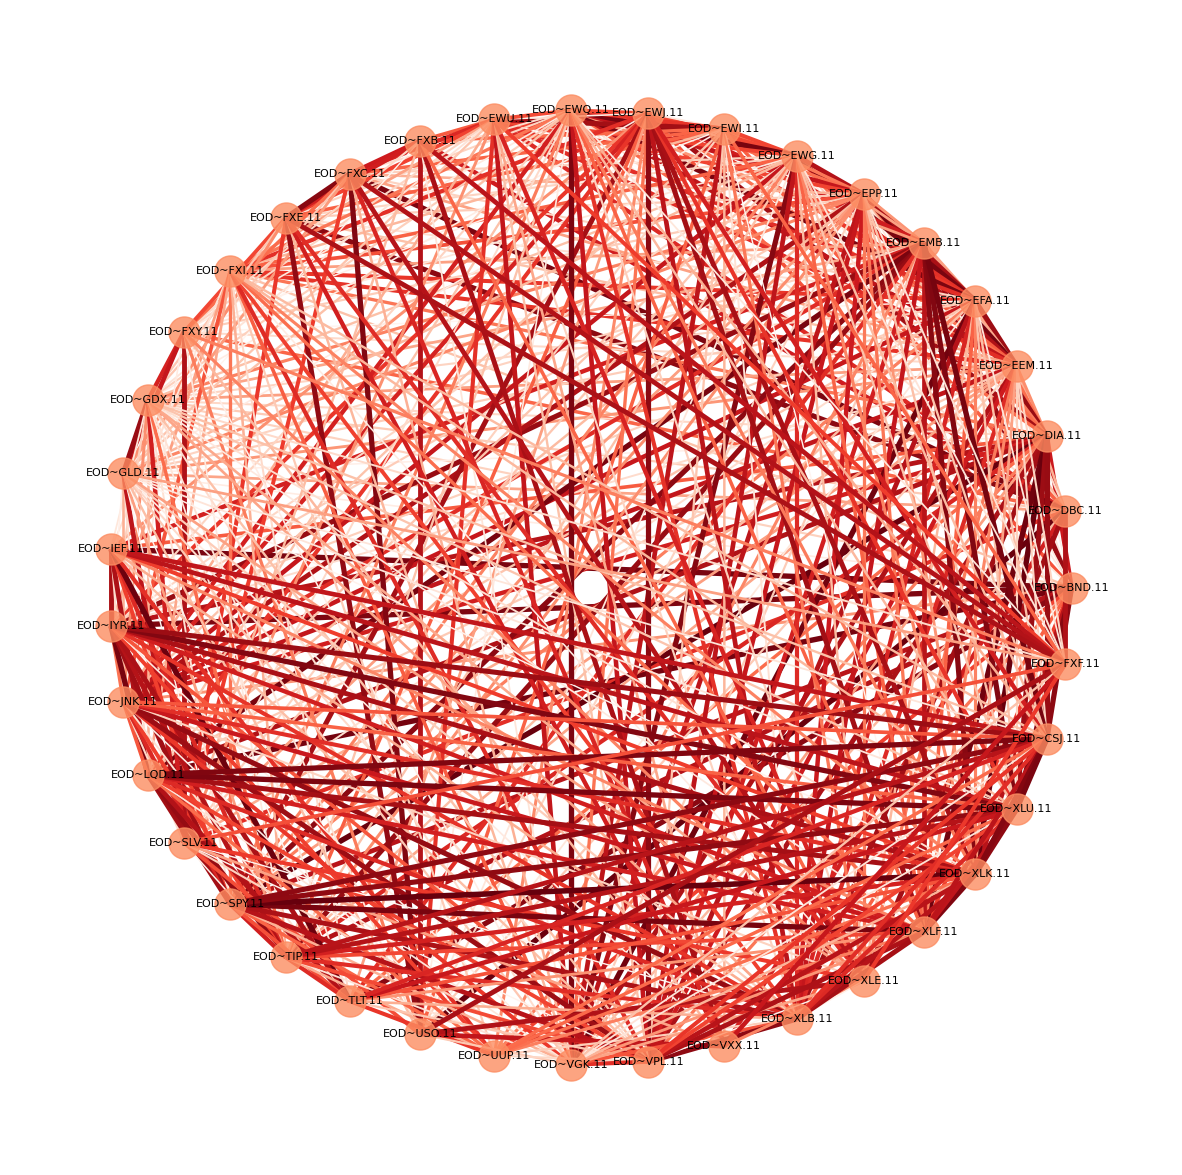

In [29]:
##Creates a copy of the graph
H = G.copy()

##Checks all the edges and removes some based on corr_direction
for stock1, stock2, weight in G.edges(data=True):
    ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
    if corr_direction == "positive":
        if weight["weight"] <0:
            H.remove_edge(stock1, stock2)
    ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
    else:
        if weight["weight"] >=0:
            H.remove_edge(stock1, stock2)


#crates a list for edges and for the weights
edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

### increases the value of weights, so that they are more visible in the graph
weights = tuple([(1+abs(x))**2 for x in weights])

#positions
positions=nx.circular_layout(H)

#Figure size
plt.figure(figsize=(15,15))

#draws nodes
nx.draw_networkx_nodes(H,positions,node_color='#FC8D62', 
                       node_size=500,alpha=0.8)

#Styling for labels
nx.draw_networkx_labels(H, positions, font_size=8, 
                        font_family='sans-serif')

###edge colors based on weight direction
if corr_direction == "positive":
    edge_colour = plt.cm.Reds
else:
    edge_colour = plt.cm.Greens

#draws the edges
nx.draw_networkx_edges(H, positions, style='solid',
                      ###adds width=weights and edge_color = weights 
                      ###so that edges are based on the weight parameter 
                      ###edge_cmap is for the color scale based on the weight
                      ### edge_vmin and edge_vmax assign the min and max weights for the width
                      width=weights, edge_color = weights, edge_cmap = edge_colour,
                      edge_vmin = min(weights), edge_vmax=max(weights))

# displays the graph without axis
plt.axis('off')
#saves image
plt.savefig("part3" + corr_direction + ".png", format="PNG")
plt.show()


The code is creating a graph visualization based on a given input graph G.

First, it creates a copy of the graph G and then removes some edges based on corr_direction (either "positive" or "negative") and min_correlation. If corr_direction is "positive", it removes edges with weight less than 0 or less than min_correlation. If corr_direction is "negative", it removes edges with weight greater than or equal to 0 or greater than min_correlation.

Next, it calculates the degree of each node in the remaining graph H and uses it to determine the size of the nodes.

Then, it generates a circular layout for the nodes and sets the figure size to 15x15. It draws the nodes with their respective sizes, using a pinkish color (#DA70D6) and their labels with font size of 8.

The edge colors are based on the weight direction (edge_colour), using a blueish-green (GnBu) color map if corr_direction is "positive" and a purplish-red (PuRd) color map if corr_direction is "negative". It then draws the edges, setting their widths to weights (based on the weight of each edge), their colors also based on weights, and the color map set to edge_colour.

Finally, it turns off the axis, saves the image with a filename based on corr_direction, and displays the plot.

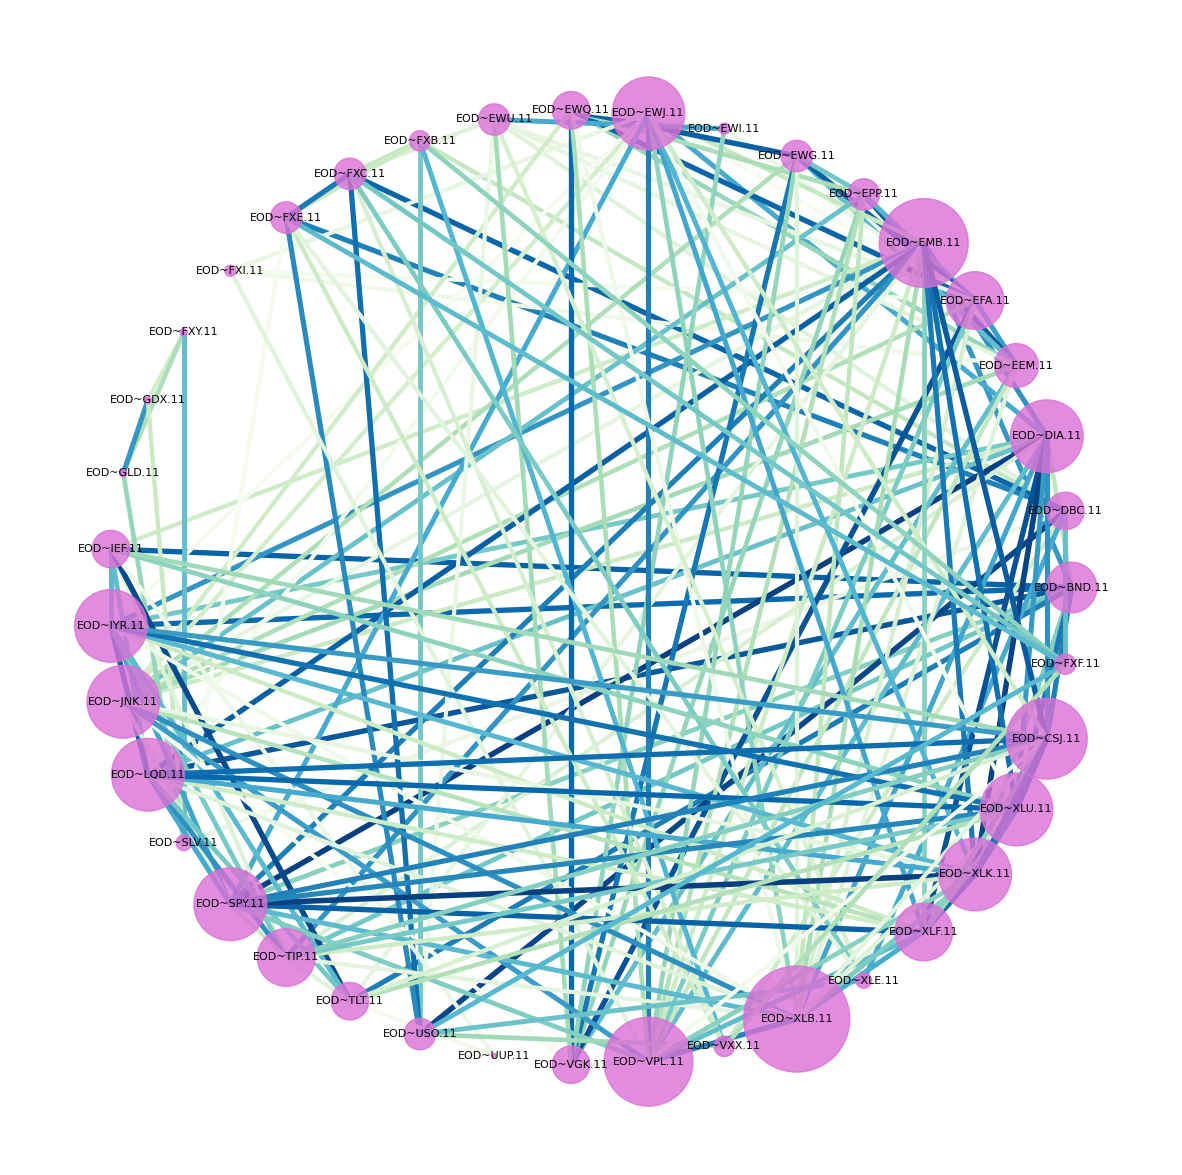

In [21]:
# Creates a copy of the graph
H = G.copy()
min_correlation=0.7


# Checks all the edges and removes some based on corr_direction
for stock1, stock2, weight in G.edges(data=True):
    # If we only want to see the positive correlations, we then delete the edges with weight smaller than 0
    if corr_direction == "positive":
        # Adds a minimum value for correlation. If correlation is weaker than the min, then it deletes the edge.
        if weight["weight"] < 0 or weight["weight"] < min_correlation:
            H.remove_edge(stock1, stock2)
    # This part runs if the corr_direction is negative and removes edges with weights equal or larger than 0.
    else:
        # Adds a minimum value for correlation. If correlation is weaker than the min, then it deletes the edge.
        if weight["weight"] >= 0 or weight["weight"] > min_correlation:
            H.remove_edge(stock1, stock2)

# Creates a list for edges and for the weights
edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())

# Increases the value of weights, so that they are more visible in the graph
weights = tuple([(1+abs(x))**2 for x in weights])

##Calculates the degree of each node
d = dict(nx.degree(H))

##Creates a list of nodes and a list of their degrees that will be used later for their sizes
nodelist, node_sizes = zip(*d.items())


# Positions
positions = nx.circular_layout(H)

# Figure size
plt.figure(figsize=(15, 15))

# Draws nodes
nx.draw_networkx_nodes(H, positions, node_color='#DA70D6', nodelist=nodelist,
                       # The node size will be now based on its degree
                       node_size=tuple([x**3 for x in node_sizes]), alpha=0.8)

# Styling for labels
nx.draw_networkx_labels(H, positions, font_size=8, font_family='sans-serif')

# Edge colors based on weight direction
if corr_direction == "positive":
    edge_colour = plt.cm.GnBu 
else:
    edge_colour = plt.cm.PuRd
        
# Draws the edges
nx.draw_networkx_edges(H, positions,  style='solid',
                       # Adds width=weights and edge_color=weights so that edges are based on the weight parameter.
                       # edge_cmap is for the color scale based on the weight. edge_vmin and edge_vmax assign the
                       # min and max weights for the width.
                       width=weights, edge_color=weights, edge_cmap=edge_colour,
                       edge_vmin=min(weights), edge_vmax=max(weights))

# Displays the graph without axis
plt.axis('off')

# Saves image
plt.savefig("part5" + corr_direction + ".png", format="PNG")

# Shows the plot
plt.show()
